In [5]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Visual Python: Data Analysis > File
df = pd.read_excel('./forclustering.xlsx')
df.head()

,Row Labels,Average of precipitation_mm,Average of cloud_cover,Average of wind_speed,Average of pressure,Average of humidity,Average of temp_avg,Average of nh3,Average of pm10,Average of pm2_5,Average of so2,Average of o3,Average of no2,Average of no,Average of co,Average of aqi
0,Agra,0.672324,37.262842,8.141505,1008.161189,63.556084,25.231494,11.928586,113.150058,91.356494,12.627804,68.841546,18.247704,1.529985,871.729381,3.829805
1,Ahmedabad,0.786957,38.664385,9.697973,1008.278862,55.145564,27.932570,10.766761,78.176352,56.918339,24.134551,54.364483,21.167837,4.881929,756.519387,3.274596
2,Allahabad,0.729114,40.474618,8.134434,1007.764429,65.099908,26.155076,16.535422,111.256018,93.393298,14.033153,71.375073,15.416326,0.934507,869.604555,3.853749
3,Amritsar,0.641143,32.484277,6.919465,1008.619655,68.320052,23.185885,24.280899,149.561292,120.911053,9.767383,74.813877,19.782981,2.082924,1202.230169,4.263167
4,Bangalore,0.689342,70.343175,12.049686,1011.593631,69.000672,23.657244,3.658211,25.922913,21.848693,6.529540,49.177801,14.974387,3.116439,511.519962,2.141116


> We will cluster only on the basis of all pollutants and aqi since its an AQI analysis of cities and then use the clustering no for the cities
>
> And, we are not following the elbow method to find the optimal K since we want to classify the cities into 3 clusters only as per our requirement i.e.., Highly polluted, Medium Polluted and Low polluted

In [10]:
## making subset for clustering 

In [13]:
# Visual Python: Data Analysis > Subset
ss = df.loc[:, ['Average of nh3','Average of pm10','Average of pm2_5','Average of so2','Average of o3','Average of no2','Average of no','Average of co','Average of aqi']]
ss.head()

,Average of nh3,Average of pm10,Average of pm2_5,Average of so2,Average of o3,Average of no2,Average of no,Average of co,Average of aqi
0,11.928586,113.150058,91.356494,12.627804,68.841546,18.247704,1.529985,871.729381,3.829805
1,10.766761,78.176352,56.918339,24.134551,54.364483,21.167837,4.881929,756.519387,3.274596
2,16.535422,111.256018,93.393298,14.033153,71.375073,15.416326,0.934507,869.604555,3.853749
3,24.280899,149.561292,120.911053,9.767383,74.813877,19.782981,2.082924,1202.230169,4.263167
4,3.658211,25.922913,21.848693,6.529540,49.177801,14.974387,3.116439,511.519962,2.141116


In [15]:
## standardizing the data for better accuracy

In [18]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Prep
from sklearn.preprocessing import StandardScaler

model = StandardScaler()

# [2] Fit
model.fit(ss)

# [3] Transform
z_ss = model.transform(ss)

In [20]:
zss = pd.DataFrame(z_ss)

In [22]:
zss.head()

,0,1,2,3,4,5,6,7,8
0,0.158410,0.436556,0.432115,-0.275948,0.666475,0.062439,-0.331949,0.194158,0.739227
1,-0.016396,-0.248726,-0.386238,0.605265,-0.805962,0.331835,0.445599,-0.077752,-0.092396
2,0.851545,0.399444,0.480515,-0.168323,0.924155,-0.198768,-0.470082,0.189143,0.775092
3,2.016912,1.150005,1.134418,-0.495006,1.273910,0.204075,-0.203684,0.974180,1.388343
4,-1.085933,-1.272590,-1.219596,-0.742967,-1.333491,-0.239539,0.036059,-0.655980,-1.790190


In [26]:
## clustering

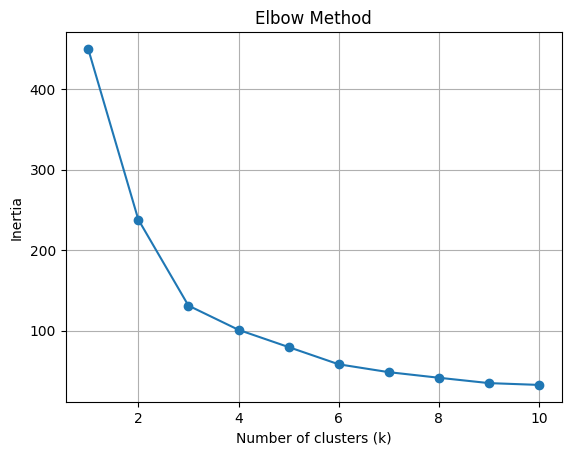

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X = your data (numpy array or df.values)

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(zss)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [30]:
# Visual Python: Machine Learning > Pipeline
# [1] Clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)

# [2] Fit
model.fit(zss)

# [3] Predict
clust = model.predict(zss)

In [32]:
clust

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0], dtype=int32)

In [35]:
## adding the cluster numbers to the original dataset to find which city falls in which cluster

In [37]:
df['cluster'] = clust

In [117]:
df.to_excel('clusteredcitiesAQI.xlsx')